# Shallow Neural Network in PyTorch

In this notebook, we adapt our [TensorFlow Shallow Net](https://github.com/jonkrohn/DLTFpT/blob/master/notebooks/shallow_net_in_tensorflow.ipynb) to PyTorch.

<a href="https://colab.research.google.com/github/jonkrohn/DLTFpT/blob/master/notebooks/shallow_net_in_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Load dependencies

In [1]:
import torch
import torch.nn as nn

from torchvision.datasets import MNIST
from torchvision import transforms

from torchsummary import summary

import matplotlib.pyplot as plt

#### Load data

In [2]:
train = MNIST('data', train=True, transform=transforms.ToTensor(), download=True)
test = MNIST('data', train=False, transform=transforms.ToTensor())
# ...toTensor() scales pixels from [0, 255] to [0, 1]

100%|██████████| 9912422/9912422 [00:00<00:00, 61642777.86it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 65798855.96it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 27069339.45it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11359885.97it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
train.data.shape

torch.Size([60000, 28, 28])

In [4]:
train.data[0] # not scaled! 

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

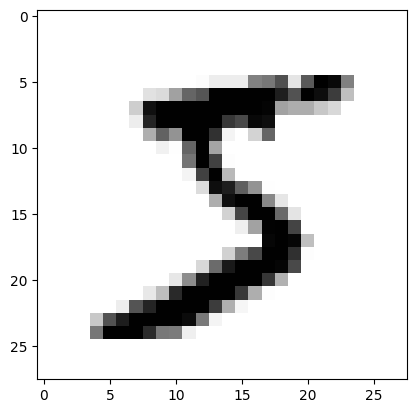

In [5]:
_ = plt.imshow(train.data[0].numpy().squeeze(), cmap='gray_r') # squeeze() removes dims of length one

In [6]:
train.targets[0:100]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7,
        1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1])

In [7]:
train.targets.shape

torch.Size([60000])

In [8]:
test.data.shape

torch.Size([10000, 28, 28])

In [9]:
test.targets.shape

torch.Size([10000])

#### Batch data

In [10]:
train_loader = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True) 
test_loader = torch.utils.data.DataLoader(test, batch_size=128) 
# ...DataLoader() can also sample and run multithreaded over a set number of workers

In [12]:
X_sample, y_sample = next(iter(train_loader))

In [13]:
X_sample.shape

torch.Size([128, 1, 28, 28])

In [14]:
y_sample.shape

torch.Size([128])

In [15]:
y_sample

tensor([8, 7, 5, 3, 9, 2, 9, 8, 2, 3, 1, 1, 6, 9, 8, 1, 1, 0, 9, 5, 9, 4, 1, 4,
        0, 3, 3, 7, 3, 4, 2, 1, 4, 4, 0, 1, 5, 0, 8, 4, 1, 6, 1, 6, 2, 9, 9, 4,
        7, 4, 7, 6, 7, 3, 5, 0, 6, 9, 9, 7, 4, 3, 0, 4, 0, 1, 4, 0, 8, 3, 9, 3,
        3, 2, 4, 9, 0, 6, 1, 1, 4, 8, 2, 9, 6, 8, 6, 2, 6, 9, 1, 4, 1, 8, 5, 9,
        1, 5, 0, 0, 5, 2, 5, 3, 7, 2, 7, 4, 2, 4, 7, 3, 1, 8, 3, 8, 2, 7, 4, 8,
        1, 9, 1, 0, 3, 6, 0, 8])

In [16]:
X_sample[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [17]:
X_flat_sample = X_sample.view(X_sample.shape[0], -1) # view() reshapes Tensor (confusingly)

In [18]:
X_flat_sample.shape

torch.Size([128, 784])

In [19]:
X_flat_sample[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

#### Design neural network architecture

In [20]:
n_input = 784
n_dense = 64
n_out = 10

In [21]:
model = nn.Sequential(
    nn.Linear(n_input, n_dense), # hidden layer
    nn.Sigmoid(), # activation function
    nn.Linear(n_dense, n_out) # output layer
)

In [22]:
summary(model, (1, n_input))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]          50,240
           Sigmoid-2                [-1, 1, 64]               0
            Linear-3                [-1, 1, 10]             650
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.19
Estimated Total Size (MB): 0.20
----------------------------------------------------------------


#### Configure training hyperparameters

In [23]:
cost_fxn = nn.CrossEntropyLoss() # includes softmax activation

In [24]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

#### Train

In [25]:
def accuracy_pct(pred_y, true_y):
  _, prediction = torch.max(pred_y, 1) # returns maximum values, indices; fed tensor, dim to reduce
  correct = (prediction == true_y).sum().item()
  return (correct / true_y.shape[0]) * 100.0

In [26]:
n_batches = len(train_loader)
n_batches

469

In [27]:
n_epochs = 20 

print('Training for {} epochs. \n'.format(n_epochs))

for epoch in range(n_epochs):
  
  avg_cost = 0.0
  avg_accuracy = 0.0
  
  for i, (X, y) in enumerate(train_loader): # enumerate() provides count of iterations  
    
    # forward propagation:
    X_flat = X.view(X.shape[0], -1)
    y_hat = model(X_flat)
    cost = cost_fxn(y_hat, y)
    avg_cost += cost / n_batches
    
    # backprop and optimization via gradient descent: 
    optimizer.zero_grad() # set gradients to zero; .backward() accumulates them in buffers
    cost.backward()
    optimizer.step()
    
    # calculate accuracy metric:
    accuracy = accuracy_pct(y_hat, y)
    avg_accuracy += accuracy / n_batches
    
    if (i + 1) % 100 == 0:
      print('Step {}'.format(i + 1))
    
  print('Epoch {}/{} complete. Cost: {:.3f}, Accuracy: {:.1f}% \n'
        .format(epoch + 1, n_epochs, avg_cost, avg_accuracy)) 

print('Training complete.')

Training for 20 epochs. 

Step 100
Step 200
Step 300
Step 400
Epoch 1/20 complete. Cost: 2.252, Accuracy: 29.2% 

Step 100
Step 200
Step 300
Step 400
Epoch 2/20 complete. Cost: 2.092, Accuracy: 57.5% 

Step 100
Step 200
Step 300
Step 400
Epoch 3/20 complete. Cost: 1.843, Accuracy: 64.4% 

Step 100
Step 200
Step 300
Step 400
Epoch 4/20 complete. Cost: 1.543, Accuracy: 69.6% 

Step 100
Step 200
Step 300
Step 400
Epoch 5/20 complete. Cost: 1.282, Accuracy: 74.1% 

Step 100
Step 200
Step 300
Step 400
Epoch 6/20 complete. Cost: 1.086, Accuracy: 77.6% 

Step 100
Step 200
Step 300
Step 400
Epoch 7/20 complete. Cost: 0.944, Accuracy: 80.3% 

Step 100
Step 200
Step 300
Step 400
Epoch 8/20 complete. Cost: 0.840, Accuracy: 81.9% 

Step 100
Step 200
Step 300
Step 400
Epoch 9/20 complete. Cost: 0.760, Accuracy: 83.4% 

Step 100
Step 200
Step 300
Step 400
Epoch 10/20 complete. Cost: 0.699, Accuracy: 84.4% 

Step 100
Step 200
Step 300
Step 400
Epoch 11/20 complete. Cost: 0.650, Accuracy: 85.2% 

Step

#### Test model

In [28]:
n_test_batches = len(test_loader)
n_test_batches

79

In [29]:
model.eval() # disables dropout (and batch norm)

with torch.no_grad(): # disables autograd, reducing memory consumption
  
  avg_test_cost = 0.0
  avg_test_acc = 0.0
  
  for X, y in test_loader:
    
    # make predictions: 
    X_flat = X.view(X.shape[0], -1)
    y_hat = model(X_flat)
    
    # calculate cost: 
    cost = cost_fxn(y_hat, y)
    avg_test_cost += cost / n_test_batches
    
    # calculate accuracy:
    test_accuracy = accuracy_pct(y_hat, y)
    avg_test_acc += test_accuracy / n_test_batches

print('Test cost: {:.3f}, Test accuracy: {:.1f}%'.format(avg_test_cost, avg_test_acc))

# model.train() # 'undoes' model.eval()

Test cost: 0.421, Test accuracy: 89.5%
